# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [1]:
NAME = "IAD28"
COLLABORATORS = "Radosław Matuszczyk 405124, Piotr Łukasiewicz 406163"

---

## Zestaw zadań 2: Elementy statystyki opisowej 2 (Notatnik 2/4)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Wczytaj dane z przygotowanego wcześniej pliku recession_data_1.csv do tablicy `recession_data_1` w taki sposób, aby kolumna Country Code stanowiła indeks tablicy.

Wyświetl przygotowaną tablicę.

In [4]:
recession_data_1 = pd.read_csv('recession_data_1.csv', index_col=0)
recession_data_1

,Country Name,Region Name,Income Group,2006,2007,2008,2009,2010,2011
Country Code,,,,,,,,,
AFG,Afghanistan,Asia,Low,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355
ALB,Albania,Europe,Lower middle,5.902659,5.983260,7.500041,3.354289,3.706938,2.545406
DZA,Algeria,Africa,Upper middle,1.700000,3.400000,2.400000,1.600000,3.600000,2.900000
ASM,American Samoa,Oceania,Upper middle,-4.098361,1.851852,-2.657343,-4.166667,0.299850,0.000000
AND,Andorra,Europe,High,4.808689,1.553188,-5.559186,-5.302847,-1.974958,-0.008070
...,...,...,...,...,...,...,...,...,...
VIR,Virgin Islands (U.S.),Americas,High,3.504993,4.010594,1.218625,-6.594789,0.596383,-8.204246
PSE,West Bank and Gaza,Asia,Lower middle,-0.996556,3.788282,7.429182,8.593491,5.777362,9.600808
YEM,"Yemen, Rep.",Asia,Low,3.170409,3.338428,3.647569,3.866230,7.702307,-12.714897


### Zadnie 2: Prezentacja danych w formie tabelarycznej [10 pkt]

Przygotuj trzy tablice szeregów rodzielczych przedziałowych częstości wskaźnika GDP growth (annual %) dla poszczególnych lat.

Pierwsza tablica (`recession_table_1`) powinna zawierać szeregi skonstruowane w obarciu o całość danych.

Indeks:
 - Year (wszystkie lata)
 
Kolumny:
 - Kolejne przedziały (-20, -15]	(-15, -10] ... (30, 35] zdefiniowane jako IntervalIndex

Druga tablica (`recession_table_2`) powinna zawierać szeregi skonstruowane indywidualnie dla każdego z rejonów geograficznych.

Indeks:
 - 1 poziomu: Region Name
 - 2 poziomu: Year (wszystkie lata dla każdego z rejonów)
 
Kolumny:
 - Kolejne przedziały (-20, -15]	(-15, -10] ... (30, 35] zdefiniowane jako IntervalIndex

Trzecia tablica (`recession_table_3`) powinna zawierać szeregi skonstruowane indywidualnie dla każdego stopnia zamożności.

Indeks:
 - 1 poziomu: Income Group
 - 2 poziomu: Year (wszystkie lata dla każdej z grup)
 
Kolumny:
 - Kolejne przedziały (-20, -15]	(-15, -10] ... (30, 35] zdefiniowane jako IntervalIndex
 
Wyświetl przygotowane tablice w taki sposób aby zawarte w tablicy liczby (za wyjątkiem lat i granic przedziałów w nagłówkach kolumn i wierszy) wyświetlały się z dokładnością do 2 miejsca po przecinku.

In [5]:
# Całość danych
def constructSeries(df):
    columns = df.columns[3:]
    bins = pd.IntervalIndex.from_breaks(np.arange(-20, 40, 5))
    length = df.shape[0]
    valueCounts = np.array([pd.cut(df[column], bins).value_counts().sort_index().values / length for column in columns])
    newDf = pd.DataFrame(data=valueCounts, index=columns, columns=bins)
    newDf.index.name = 'Year'
    return newDf

recession_table_1 = constructSeries(recession_data_1)
pd.io.formats.style.Styler(recession_table_1, precision=2)

,"(-20, -15]","(-15, -10]","(-10, -5]","(-5, 0]","(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]"
Year,,,,,,,,,,,
2006,0.00,0.00,0.01,0.08,0.36,0.47,0.07,0.01,0.00,0.01,0.01
2007,0.00,0.00,0.01,0.03,0.39,0.45,0.09,0.02,0.01,0.00,0.00
2008,0.01,0.01,0.03,0.13,0.45,0.32,0.05,0.01,0.00,0.00,0.00
2009,0.01,0.05,0.13,0.30,0.34,0.14,0.03,0.00,0.01,0.00,0.00
2010,0.00,0.00,0.03,0.09,0.45,0.36,0.06,0.01,0.01,0.01,0.00
2011,0.00,0.01,0.03,0.09,0.48,0.34,0.04,0.01,0.01,0.00,0.00


In [6]:
# Podział na rejony
recession_table_2 = recession_data_1.groupby('Region Name').apply(constructSeries)
pd.io.formats.style.Styler(recession_table_2, precision=2)

In [7]:
# Podział pod względem stopnia zamożności
recession_table_3 = recession_data_1.groupby('Income Group').apply(constructSeries)
pd.io.formats.style.Styler(recession_table_3, precision=2)

In [8]:
### Komórka testowa
## Tablica 1
# Kolumny
#if recession_table_1.columns.inferred_type == 'interval':
lower_boundaries = np.arange(-20, 35, 5)
for i in range(len(lower_boundaries)):
    assert recession_table_1.columns[i] == pd.Interval(lower_boundaries[i], lower_boundaries[i]+5, closed='right')
# Indeks
assert len(set(list(recession_table_1.index)) & set([2006, 2007, 2008, 2009, 2010, 2011])) == 6 \
    or len(set(list(recession_table_1.index)) & set(['2006', '2007', '2008', '2009', '2010', '2011'])) == 6
# Wartości w obrębie tablicy
assert recession_table_1.values.min() >= 0.0
assert recession_table_1.values.max() <= 1.0
assert np.all(np.isclose(recession_table_1.sum(axis=1), 1.0))==True

## Tablica 2
# Kolumny
lower_boundaries = np.arange(-20, 35, 5)
for i in range(len(lower_boundaries)):
    assert recession_table_2.columns[i] == pd.Interval(lower_boundaries[i], lower_boundaries[i]+5, closed='right')
# Indeks
assert set(list(recession_table_2.index.levels[0])) == set(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'])
set(list(recession_table_2.index.levels[1]))
assert set(list(recession_table_2.index.levels[1])) == set([2006, 2007, 2008, 2009, 2010, 2011]) \
    or set(list(recession_table_2.index.levels[1])) == set(['2006', '2007', '2008', '2009', '2010', '2011'])
# # Wartości w obrębie tablicy
assert recession_table_2.values.min() >= 0.0
assert recession_table_2.values.max() <= 1.0
assert np.all(np.isclose(recession_table_2.sum(axis=1), 1.0))==True

## Tablica 3
# Kolumny
lower_boundaries = np.arange(-20, 35, 5)
for i in range(len(lower_boundaries)):
    assert recession_table_3.columns[i] == pd.Interval(lower_boundaries[i], lower_boundaries[i]+5, closed='right')
# Indeks
assert set(list(recession_table_3.index.levels[0])) == set(['High', 'Low', 'Lower middle', 'Upper middle'])
assert set(list(recession_table_3.index.levels[1])) == set([2006, 2007, 2008, 2009, 2010, 2011]) \
    or set(list(recession_table_3.index.levels[1])) == set(['2006', '2007', '2008', '2009', '2010', '2011'])
# Wartości w obrębie tablicy
assert recession_table_3.values.min() >= 0.0
assert recession_table_3.values.max() <= 1.0
assert np.all(np.isclose(recession_table_3.sum(axis=1), 1.0))==True

### Zadanie 3: Prezentacja danych w formie graficznej [25 pkt]

#### a) Diagramy częstości

Bazując na wczytanych do notatnika danych przygotuj diagramy częstości odpowiadające danym zawartym w przygotowanych wcześniej tabelach (podział na identyczne przedziały, skonstruowane w obarciu o całość danych oraz indywidualnie dla każdego z rejonów geograficznych i dla każdego stopnia zamożności, osobne diagramy dla poszczególnych lat). 

Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x5). W górnym wierszu zawszyj diagram skonstruowany w oparciu o całość danych oraz cztery diagramy skonstruowane indywidualnie dla poszczególnych stopni zamożności, a w dolnym wierszu pięć dziagramów skonstruowanych indywidualnie dla poszczególnych rejonów geograficznych). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw identyczne zakresy wartości na odpowiadających sobie osiach wszystkich wykresów,
- ustaw różne od domyślnych i od siebie nawzajem kolory diagramów poszczególnych lat (kolory przyporządkowane poszczególnym latom powinny być identyczne na wszystkich wykresach),
- dodaj do figury lub wykresów legendę zawierającą nazwę wizualizowanego parametru oraz kolory przypisane poszczególnym latom w taki sposób, aby nie zasłaniała/zasłaniały znajdujących się na wykresach danych.

Uwaga! Zadanie należy wykonać w oparciu o wczytane do notatnika szeregi szczegółowe, a nie w oparciu o szeregi rozdzielcze częstości przygotowane w zadaniu 2.

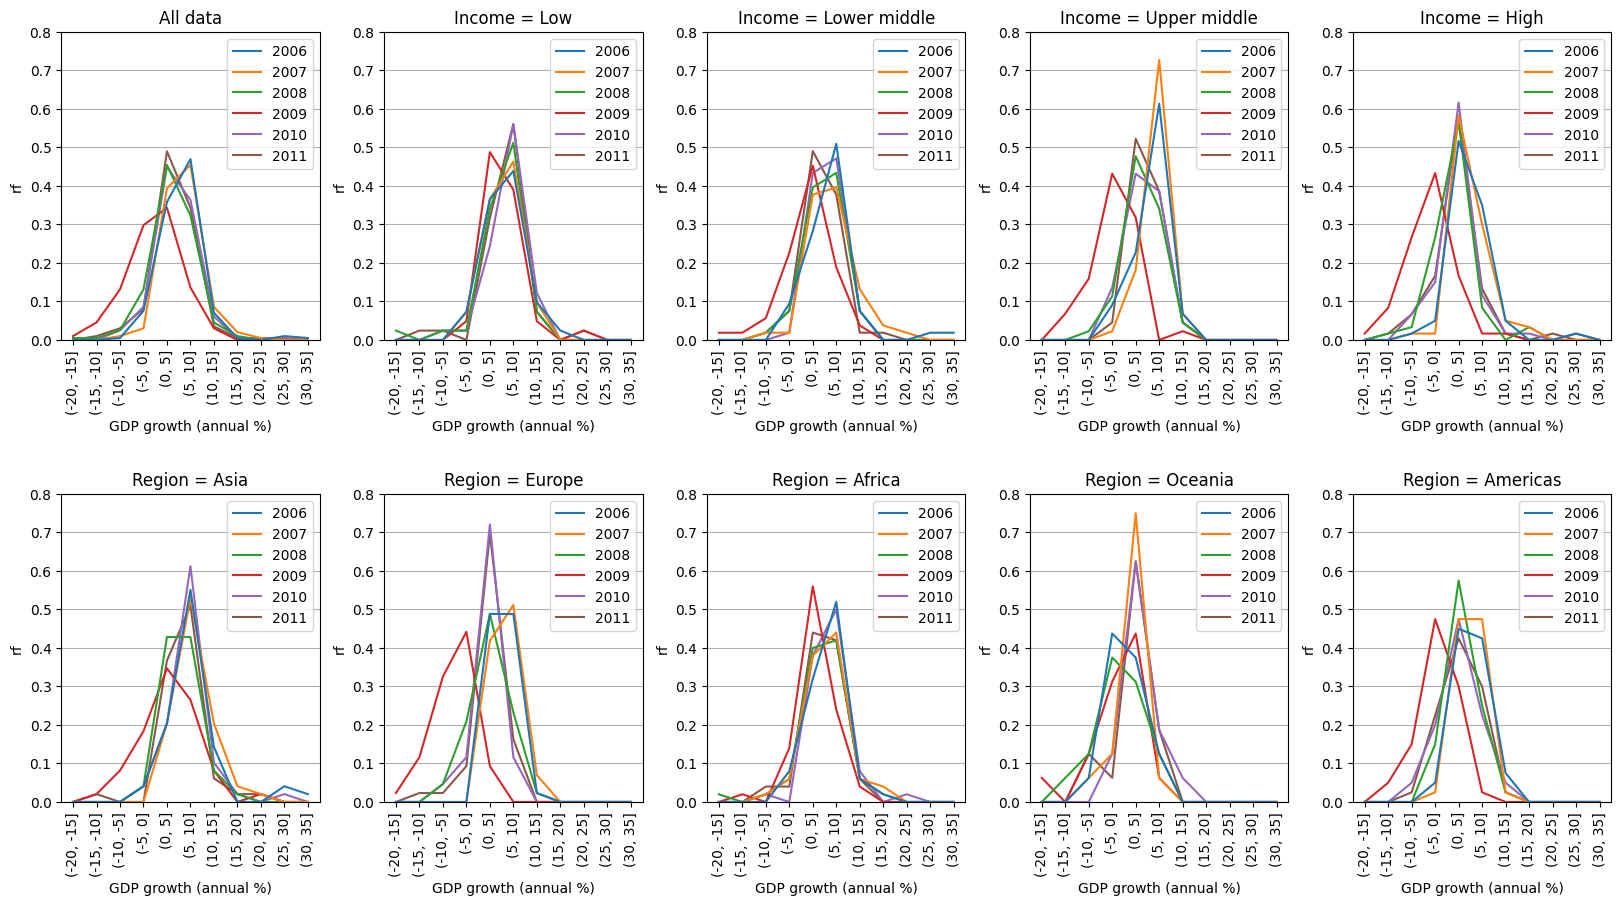

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(20,10))
fig.subplots_adjust(wspace=0.25, hspace=0.5)

def displayPlot(ax, data, title):
    data = data.loc[:,'2006':'2011']
    breaks = np.arange(-20, 40, 5)
    bins = pd.IntervalIndex.from_breaks(breaks).astype(str)
    sns.histplot(data, ax=ax, stat='proportion', common_norm=False, fill=False, bins=breaks, element='poly')
    labelsLoc = (breaks[1:] + breaks[:-1])/2
    ax.set_xticks(ticks=labelsLoc, labels=bins, rotation=90)
    ax.set_xlabel('GDP growth (annual %)')
    ax.set_ylabel('rf')
    ax.set_title(title)
    ax.set_ylim([0,0.8])
    ax.grid(axis='y')

displayPlot(ax[0][0], recession_data_1, "All data")
for ix, income in enumerate(recession_data_1['Income Group'].unique()):
    displayPlot(ax[0][ix+1], recession_data_1[recession_data_1['Income Group'] == income], 'Income = ' + income)
for ix, region in enumerate(recession_data_1['Region Name'].unique()):
    displayPlot(ax[1][ix], recession_data_1[recession_data_1['Region Name'] == region], 'Region = ' + region)

#### b) Inne typy wykresów
Bazując na wczytanych do notatnika danych przygotuj wykresy typu boxplot, violinplot, swarmplot i stripplot.

W przypadku każdego z typów wykresów zestaw wyniki na pojedynczej figurze (siatka wykresów 3x1). W górnym wierszu zawszyj wykres skonstruowany w oparciu o całość danych, w wierszu środkowym wykres zawierajacy podział na poszczególne stopnie zamożności, a w wierszu dolnym wykres zawierajacy podział na poszczególne rejony geograficzne. Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw identyczne zakresy wartości na odpowiadających sobie osiach wszystkich wykresów,
- na górnych wykresach dla całości danych użyj pojedynczego koloru jako wypełnienia,
- dla stopni zamożności ustaw jako wypełnienie skalę kolorów coolwarm,
- poszczególnym rejonom geograficznym przypisz jasne/wypłowiałe wersje kolorów przypisanych im na fladze olimpijskiej (Afryka szary, Europa jasnoniebieski itd.),
- w przypadku wykresów swarmplot i stripplot dobierz ich parametry tak by chmury punktów powiązanych z opisanymi w legendzie wariantami parametrów były rozdzielone,
- do dwóch dolnych wykresów dodaj legendę zawierającą nazwę wizualizowanego parametru oraz kolory przypisane poszczególnym rejonom geograficznym/stopniom zamożności w taki sposób, aby nie zasłaniała znajdujących się na wykresach danych.

Wykresy pudełkowe powinny zawierać oznaczenia wartości średniej, mediany oraz wartości odstających.

Uwaga! Zadanie należy wykonać w oparciu o wczytane do notatnika szeregi szczegółowe, a nie w oparciu o szeregi rozdzielcze częstości przygotowane w zadaniu 2.

C:\Users\Radek\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


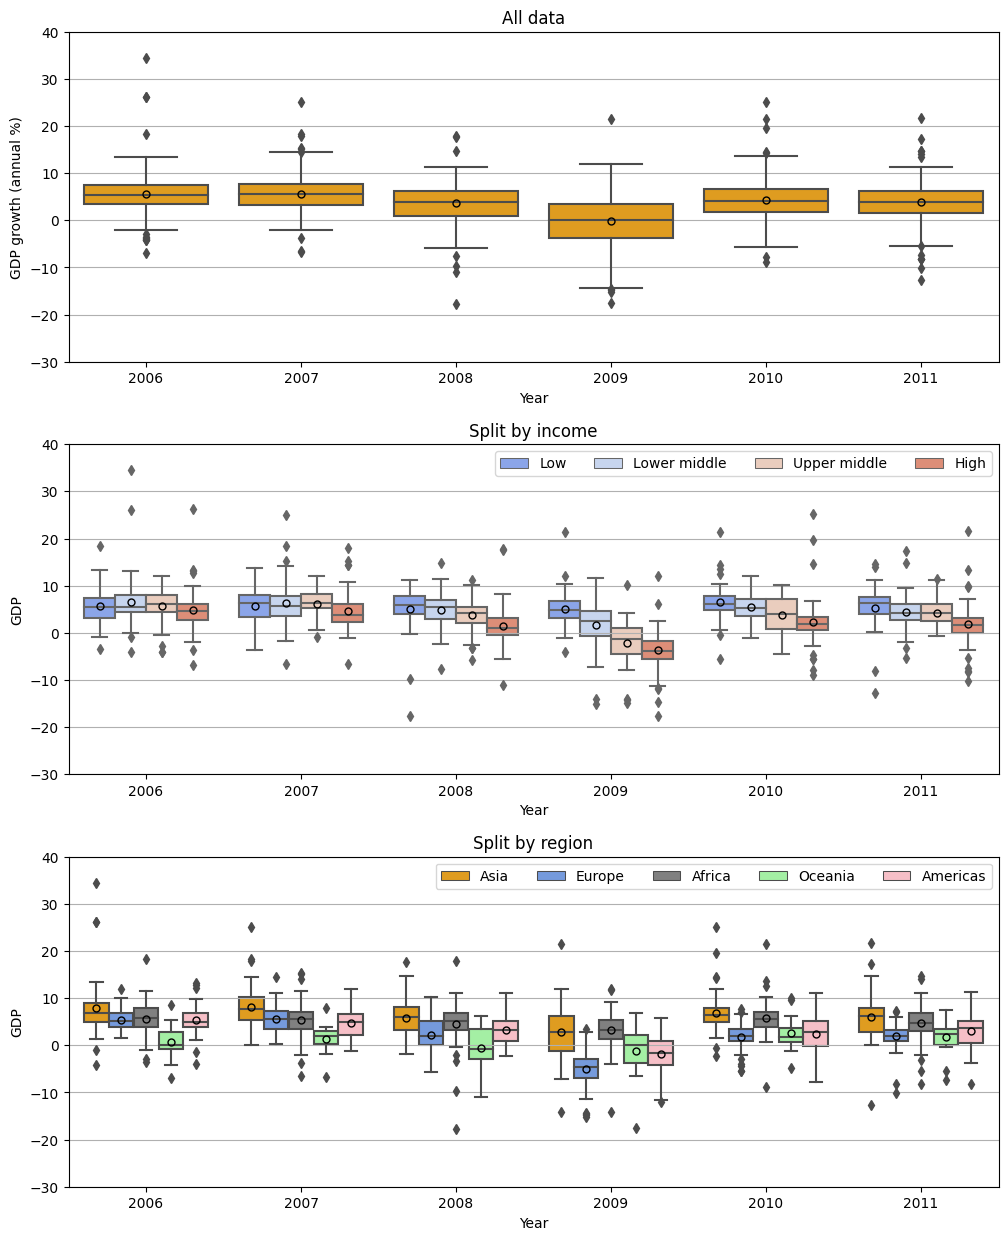

In [10]:
# Boxplot
fig, ax = plt.subplots(3, 1, figsize=(12,15))
fig.subplots_adjust(hspace=0.25)

def displayPlot(ax, title):
    ax.set_ylim([-30,40])
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP growth (annual %)')
    ax.set_title(title)
    ax.grid(axis='y')

displayPlot(ax[0], "All data")
displayPlot(ax[1], "Split by income")
displayPlot(ax[2], "Split by region")

sns.boxplot(recession_data_1, ax=ax[0], color='orange',
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"None", "markersize":5, "markeredgecolor":"black"})

dataByIncome = recession_data_1.melt(
    id_vars='Income Group',  
    var_name='Year', 
    value_name='GDP',
    value_vars=['2006', '2007', '2008', '2009', '2010', '2011'])
sns.boxplot(dataByIncome, x='Year', y='GDP', hue='Income Group', palette='coolwarm', ax=ax[1], 
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"None", "markersize":5, "markeredgecolor":"black"})
ax[1].legend(ncol=4)

dataByRegion = recession_data_1.melt(
    id_vars='Region Name',  
    var_name='Year', 
    value_name='GDP',
    value_vars=['2006', '2007', '2008', '2009', '2010', '2011'])
sns.boxplot(dataByRegion, x='Year', y='GDP', hue='Region Name', ax=ax[2], 
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"None", "markersize":5, "markeredgecolor":"black"}, 
            palette=['orange', 'cornflowerblue', 'gray', 'palegreen', 'lightpink'])
ax[2].legend(ncol=5)

C:\Users\Radek\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


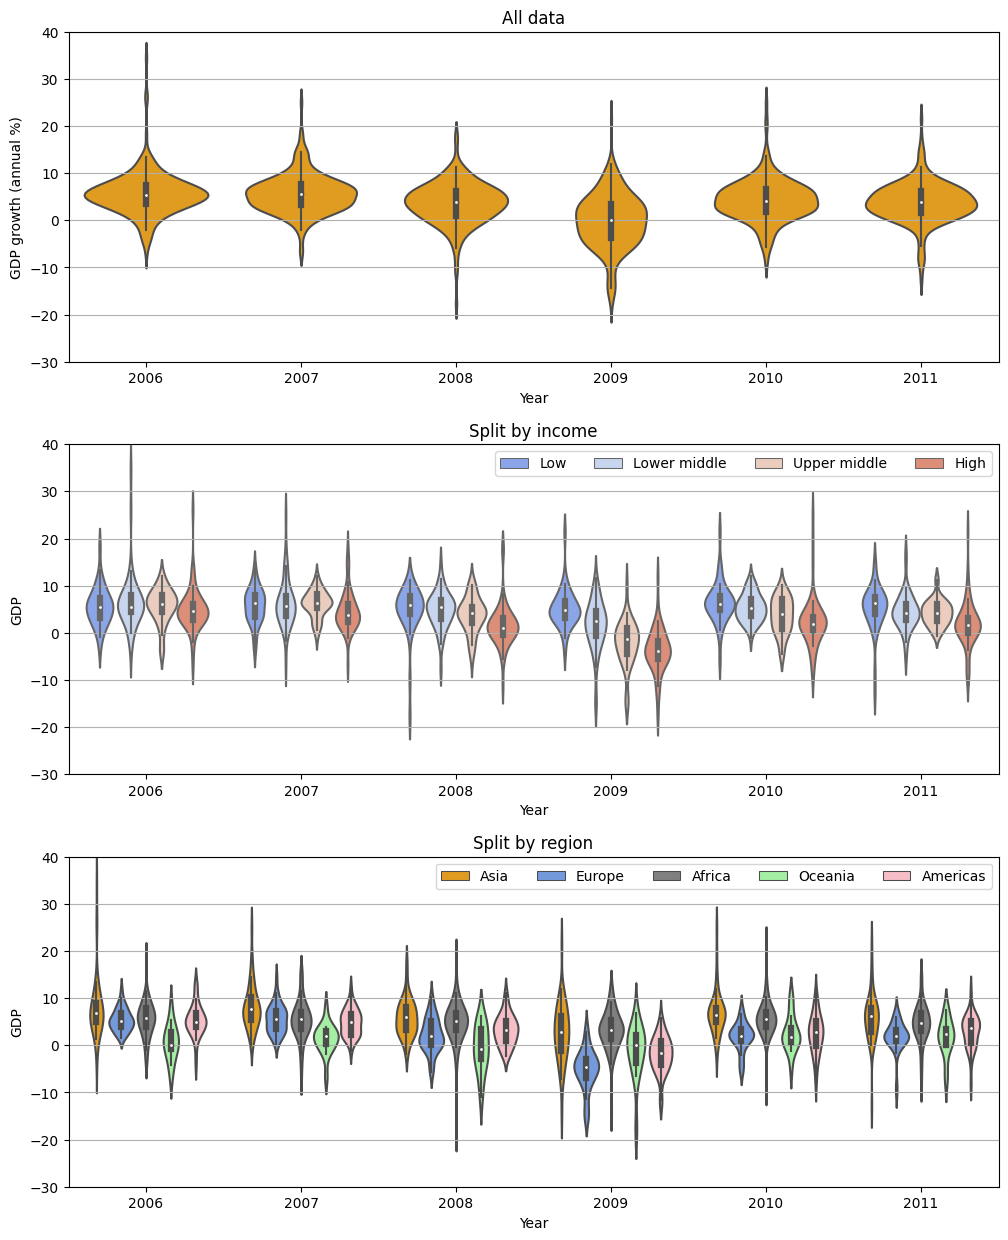

In [11]:
# Violinplot
fig, ax = plt.subplots(3, 1, figsize=(12,15))
fig.subplots_adjust(hspace=0.25)

def displayPlot(ax, title):
    ax.set_ylim([-30,40])
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP growth (annual %)')
    ax.set_title(title)
    ax.grid(axis='y')

displayPlot(ax[0], "All data")
displayPlot(ax[1], "Split by income")
displayPlot(ax[2], "Split by region")

sns.violinplot(recession_data_1, ax=ax[0], color='orange',
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"None", "markersize":5, "markeredgecolor":"black"})

sns.violinplot(dataByIncome, x='Year', y='GDP', hue='Income Group', palette='coolwarm', ax=ax[1], 
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"None", "markersize":5, "markeredgecolor":"black"})
ax[1].legend(ncol=4)

sns.violinplot(dataByRegion, x='Year', y='GDP', hue='Region Name', ax=ax[2], 
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"None", "markersize":5, "markeredgecolor":"black"}, 
            palette=['orange', 'cornflowerblue', 'gray', 'palegreen', 'lightpink'])
ax[2].legend(ncol=5);

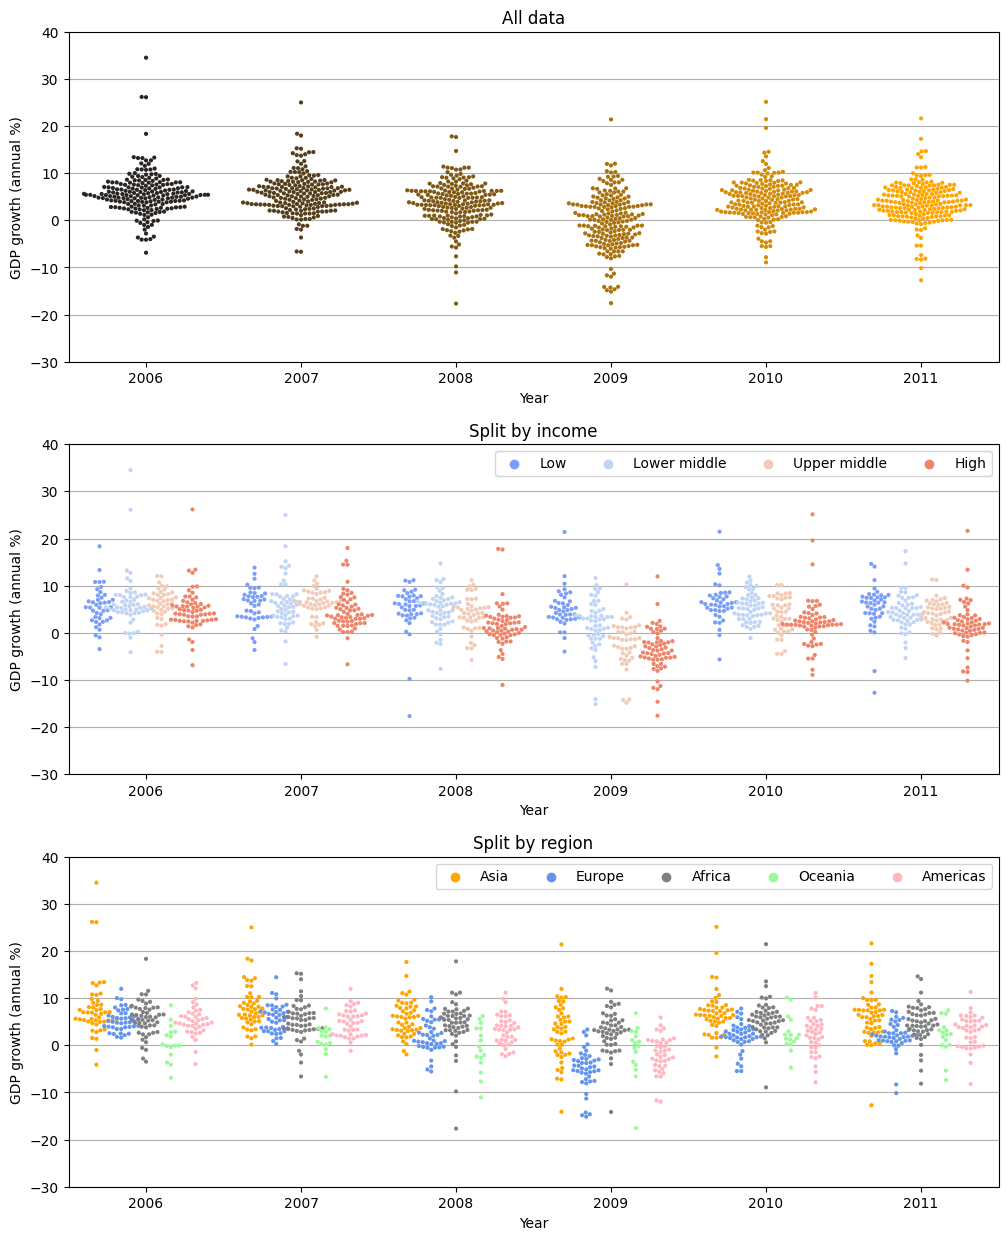

In [12]:
# Swarmplot
fig, ax = plt.subplots(3, 1, figsize=(12,15))
fig.subplots_adjust(hspace=0.25)

def displayPlot(ax, title):
    ax.set_ylim([-30,40])
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP growth (annual %)')
    ax.set_title(title)
    ax.grid(axis='y')

displayPlot(ax[0], "All data")
displayPlot(ax[1], "Split by income")
displayPlot(ax[2], "Split by region")

sns.swarmplot(recession_data_1, ax=ax[0], palette='dark:orange', size=3)

sns.swarmplot(dataByIncome, x='Year', y='GDP', hue='Income Group', size=3, palette='coolwarm', ax=ax[1], dodge=True)
ax[1].legend(ncol=4)

sns.swarmplot(dataByRegion, x='Year', y='GDP', hue='Region Name', ax=ax[2], size=3, dodge=True,
            palette=['orange', 'cornflowerblue', 'gray', 'palegreen', 'lightpink'])
ax[2].legend(ncol=5);

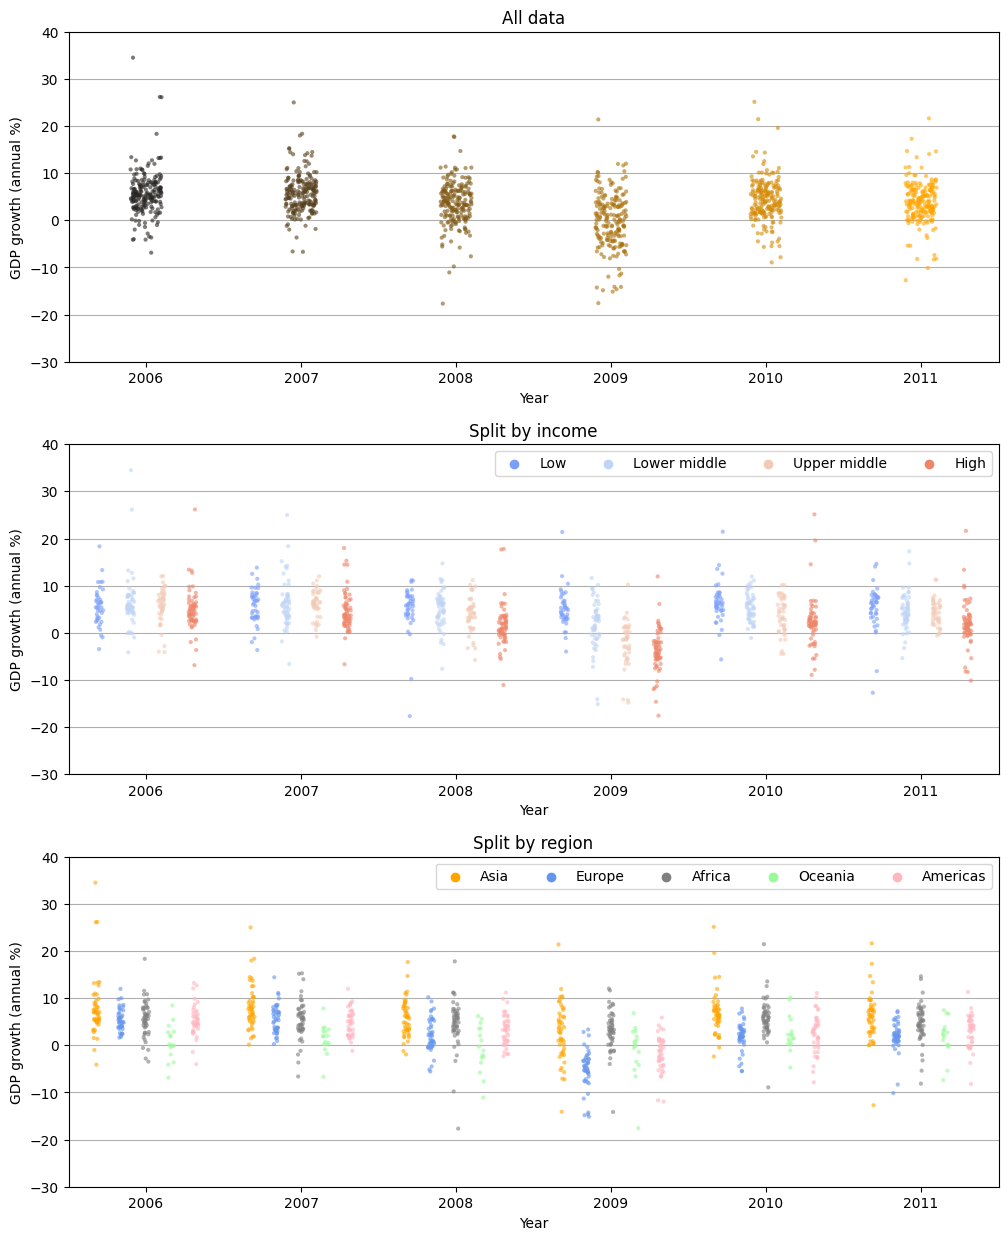

In [13]:
# Stripplot
fig, ax = plt.subplots(3, 1, figsize=(12,15))
fig.subplots_adjust(hspace=0.25)

def displayPlot(ax, title):
    ax.set_ylim([-30,40])
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP growth (annual %)')
    ax.set_title(title)
    ax.grid(axis='y')

displayPlot(ax[0], "All data")
displayPlot(ax[1], "Split by income")
displayPlot(ax[2], "Split by region")

sns.stripplot(recession_data_1, ax=ax[0], palette='dark:orange', size=3, alpha=0.6)

sns.stripplot(dataByIncome, x='Year', y='GDP', hue='Income Group', size=3, palette='coolwarm', ax=ax[1], dodge=True, alpha=0.6)
ax[1].legend(ncol=4)

sns.stripplot(dataByRegion, x='Year', y='GDP', hue='Region Name', ax=ax[2], size=3, dodge=True, alpha=0.6,
            palette=['orange', 'cornflowerblue', 'gray', 'palegreen', 'lightpink'])
ax[2].legend(ncol=5);

#### c) Dyskusja wyników

Zastanów się jakie są mocne i słabe strony poszczególnych typów wykresów wykonanych w tym zadaniu. W jakich przypadkach wykorzystanie konkretnych typów wykresów do wizualizacji może sprawiać problemy?

Diagram częstości 
- Dokładnie prezentuje zmiany częstości występowania analizowanego parametru w miarę wzrostu przedziału analizy – możemy łatwo odczytać wartości z osi Y 
- Podstawowy rodzaj wykresu znany osobom słabiej zaznajomionym z pojęciami statystycznymi
- Ze względu na wiele przecinających się linii jest trudny do odczytu - im bardziej skomplikowany wykres tym bardziej staje się nieczytelny

Boxplot
- Znakomicie prezentuje podstawowe statystki wizualizowanego parametru
- Wymaga znajomości statystyki przez interpretującego
- Nie daje dokładnego wglądu w rozkład cechy
- Może być nieczytelny w przypadku bardzo mocno odstających elemntów i nakładających się na siebie statystyk

Violinplot
- Znakomicie prezentuje rozkład wizualizowanego parametru
- Jest bardzo czytelny
- Nie daje możliwości dokładnego odczytu konkretnych statystyk, ma charakter raczej poglądowy

Swarmplot
- Znakomicie prezentuje rozkład wizualizowanego parametru
- Poszczególne punkty nie nakładają się
- Nie daje możliwości dokładnego odczytu konkretnych statystyk, ma charakter raczej poglądowy

Stripplot
- Umiarkowanie dobrze prezentuje rozkład wizualizowanego parametru
- Poszczególne punkty nakładają się, co może utrudniać interpretację
- Nie daje możliwości dokładnego odczytu konkretnych statystyk, ma charakter raczej poglądowy

Jeśli zależy nam na odczycie konkretnych wartości liczbowych z wykresu polecamy diagramy i boxploty. Jeśli wystarczy analiza rozkładu wizualizowanego parametru lepszym wyborem będą wykresy violinplot, swarmplot lub stripplot.